In [66]:
import numpy as np # mathemtaical computation
# numpy is aliased as np
import pandas as pd # data preprocessing
# pandas is aliased as pd
import matplotlib.pyplot as plt # visualization
# pyplot is aliased as plt
import seaborn as sns  # visualization
# seaborn is aliased as sns
import streamlit as st

In [117]:
#importent library's 
# Major Import
import sklearn
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline

In [68]:
df=pd.read_csv('Car Details..csv')
df.head()

,name,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,Maruti,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,Maruti,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,Hyundai,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,Datsun,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Maruti Alto LX BSIII,Maruti,2007,140000,125000,Petrol,Individual,Manual,First Owner


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   brand          4340 non-null   object
 2   year           4340 non-null   int64 
 3   selling_price  4340 non-null   int64 
 4   km_driven      4340 non-null   int64 
 5   fuel           4340 non-null   object
 6   seller_type    4340 non-null   object
 7   transmission   4340 non-null   object
 8   owner          4340 non-null   object
dtypes: int64(3), object(6)
memory usage: 305.3+ KB


In [112]:
# Split the column name to get the model of the car
df["brand"] = df.name.apply(lambda x : ' '.join(x.split('name')[:1]))
df['brand'].value_counts()

brand
Maruti Swift Dzire VDI                     69
Maruti Alto 800 LXI                        59
Maruti Alto LXi                            47
Maruti Alto LX                             35
Hyundai EON Era Plus                       35
                                           ..
Hyundai Verna Transform CRDi VGT SX ABS     1
Maruti S-Presso VXI Plus                    1
Toyota Etios Liva 1.2 VX                    1
Toyota Yaris G                              1
Hyundai i20 Magna 1.4 CRDi                  1
Name: count, Length: 1491, dtype: int64

In [18]:
df.isnull().sum()

name             0
brand            0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [71]:
df[df.duplicated()]

,name,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner
10,Maruti 800 AC,Maruti,2007,60000,70000,Petrol,Individual,Manual,First Owner
11,Hyundai Verna 1.6 SX,Hyundai,2012,600000,100000,Diesel,Individual,Manual,First Owner
12,Datsun RediGO T Option,Datsun,2017,250000,46000,Petrol,Individual,Manual,First Owner
14,Maruti Alto LX BSIII,Maruti,2007,140000,125000,Petrol,Individual,Manual,First Owner
16,Hyundai Creta 1.6 VTVT S,Hyundai,2015,850000,25000,Petrol,Individual,Manual,First Owner
...,...,...,...,...,...,...,...,...,...
4307,Mahindra Xylo H4,Mahindra,2019,599000,15000,Diesel,Individual,Manual,Third Owner
4308,Maruti Alto 800 LXI,Maruti,2018,200000,35000,Petrol,Individual,Manual,First Owner
4309,Datsun GO Plus T,Datsun,2017,350000,10171,Petrol,Dealer,Manual,First Owner
4310,Renault Duster 110PS Diesel RxL,Renault,2015,465000,41123,Diesel,Dealer,Manual,First Owner


In [72]:
df.describe() 

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [118]:

from sklearn.model_selection import train_test_split

# Define the features (x) and the target variable (y)
x = df['brand']
y = df['name']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

# Display the shapes of the training and testing sets
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


x_train shape: (3255,)
x_test shape: (1085,)
y_train shape: (3255,)
y_test shape: (1085,)


In [73]:
car = df.copy()

In [23]:
car["brand"].value_counts().index

Index(['Maruti', 'Hyundai', 'Mahindra', 'Tata', 'Honda', 'Ford', 'Toyota',
       'Chevrolet', 'Renault', 'Volkswagen', 'Skoda', 'Nissan', 'Audi', 'BMW',
       'Fiat', 'Datsun', 'Mercedes-Benz', 'Jaguar', 'Mitsubishi', 'Land',
       'Volvo', 'Ambassador', 'Jeep', 'MG', 'OpelCorsa', 'Daewoo', 'Force',
       'Isuzu', 'Kia'],
      dtype='object', name='brand')

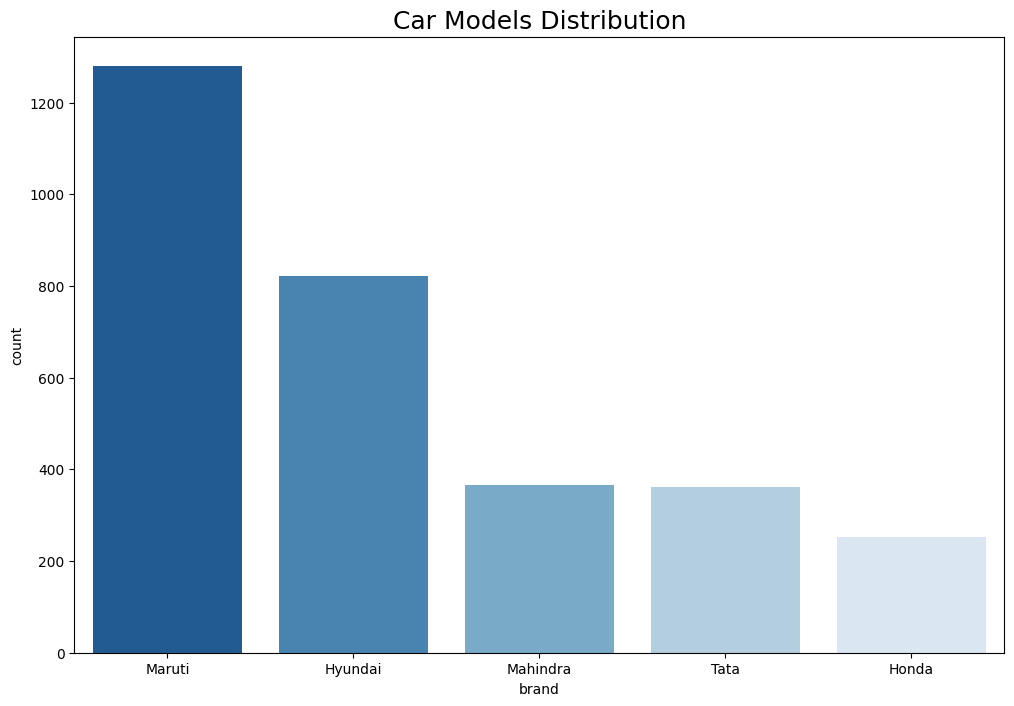

In [74]:
# Plot of Car Models Distribution
figure = plt.figure(figsize=(12,8))
plt.title('Car Models Distribution', fontsize=18)
plot = sns.countplot(x="brand", data=car, order = car['brand'].value_counts().index[:5], palette='Blues_r')
plt.show()

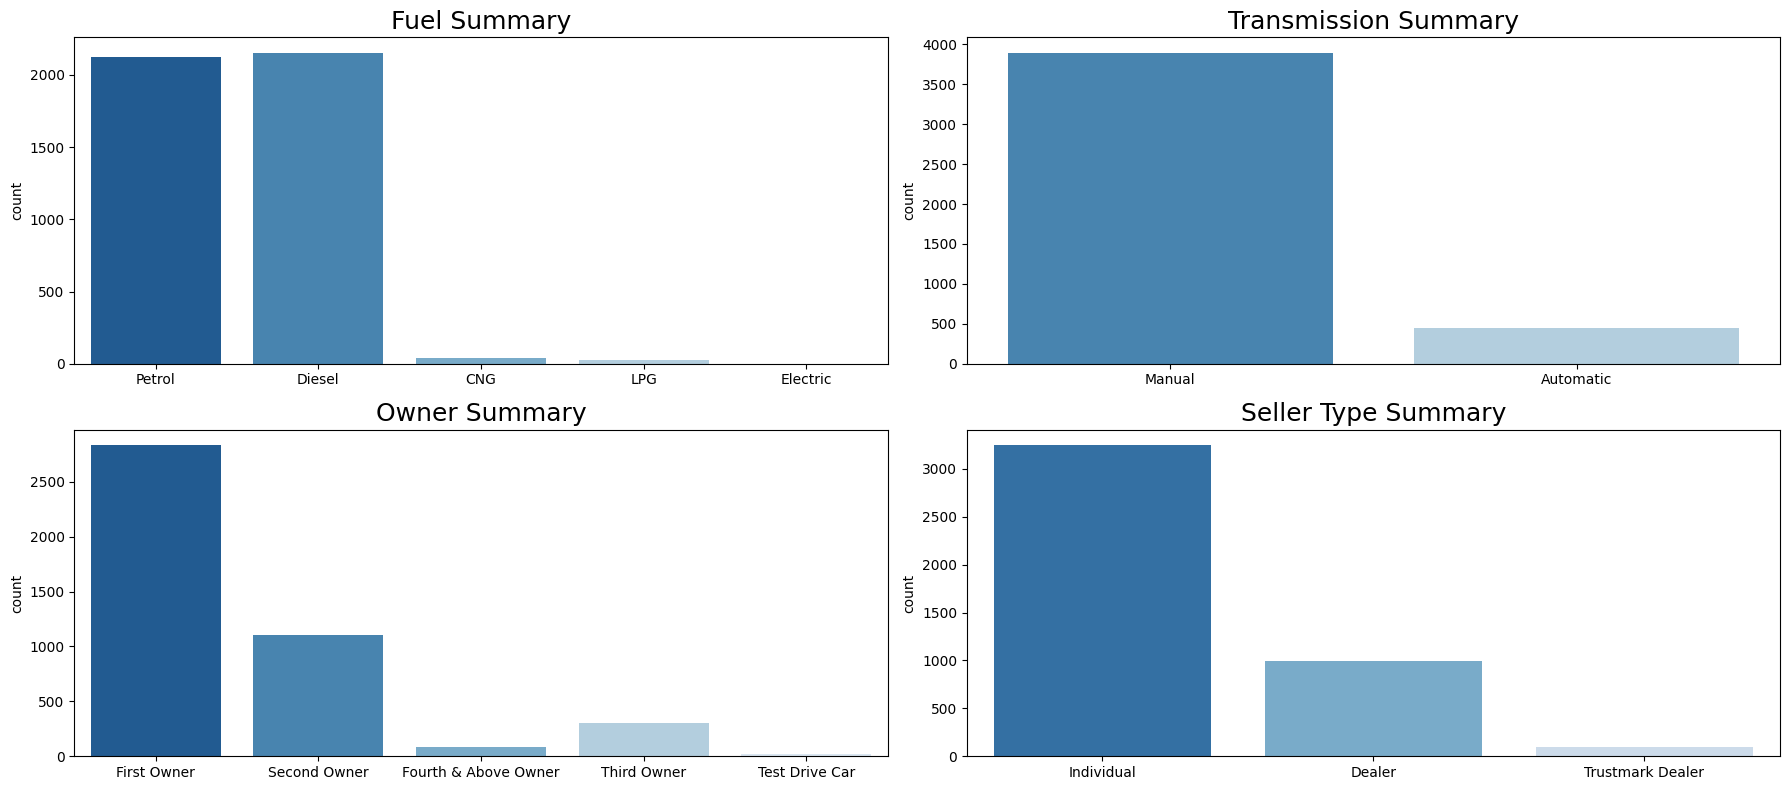

In [75]:
# Subplot of Categorical Summary
plt.figure(figsize=(18,8))

plt.subplot(2,2,1)
plt.title('Fuel Summary', fontsize=18)
sns.countplot(data=car, x='fuel', palette='Blues_r')
plt.xlabel('')
plt.subplot(2,2,2)
plt.title('Transmission Summary', fontsize=18)
sns.countplot(data=car, x='transmission', palette='Blues_r')
plt.xlabel('')
plt.subplot(2,2,3)
plt.title('Owner Summary', fontsize=18)
sns.countplot(data=car, x='owner', palette='Blues_r')
plt.xlabel('')
plt.subplot(2,2,4)
plt.title('Seller Type Summary', fontsize=18)
sns.countplot(data=car, x='seller_type', palette='Blues_r')
plt.xlabel('')

plt.tight_layout()
plt.show()

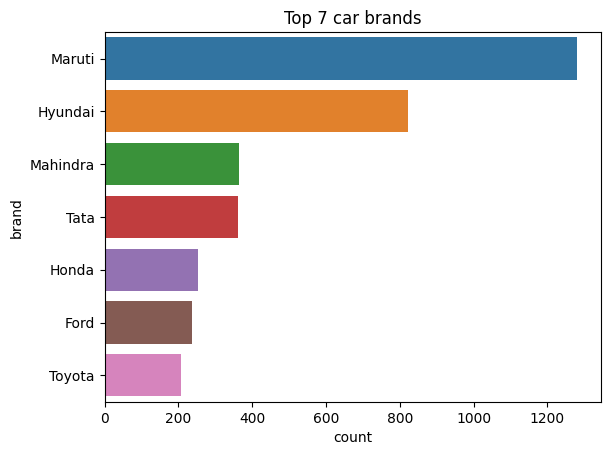

In [76]:
sns.countplot(y=df['brand'],
              order=df['brand'].value_counts().sort_values(ascending=False)[:7].index)
plt.title('Top 7 car brands')
plt.show()

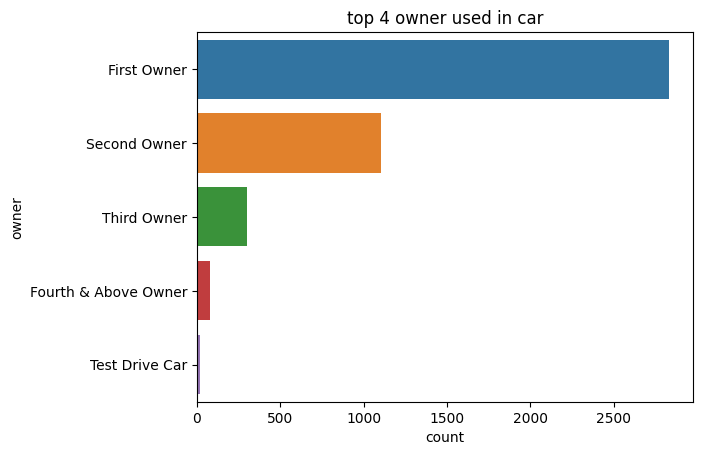

In [27]:
sns.countplot(y=df['owner'],
              order=df['owner'].value_counts().sort_values(ascending=False).index)
plt.title('top 4 owner used in car')
plt.show()

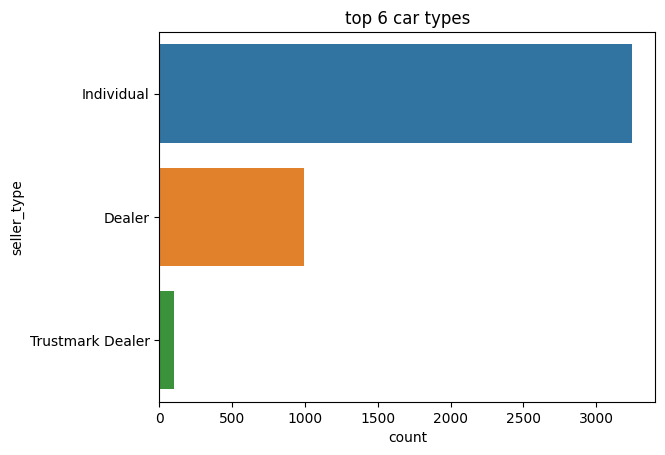

In [77]:
sns.countplot(y=df['seller_type'],
             order=df['seller_type'].value_counts().sort_values(ascending=False)[:6].index)
plt.title('top 6 car types')
plt.show()

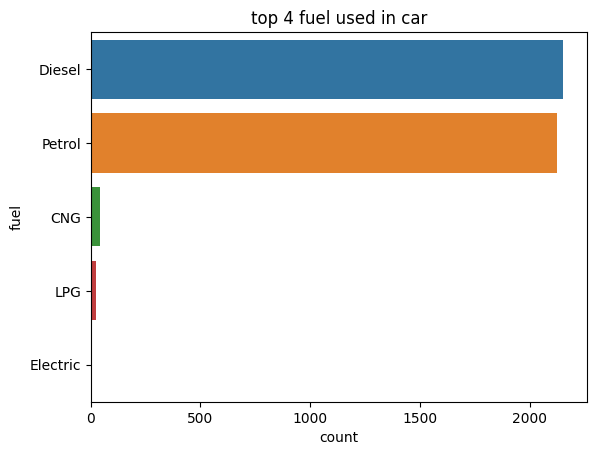

In [78]:
sns.countplot(y=df['fuel' ],
              order=df['fuel' ].value_counts().sort_values(ascending=False).index)
plt.title('top 4 fuel used in car')
plt.show()

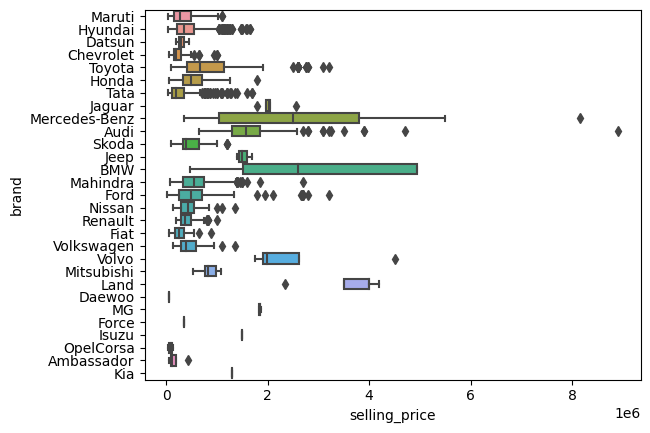

In [79]:
sns.boxplot(y=df['brand'],x=df['selling_price'])
plt.show()

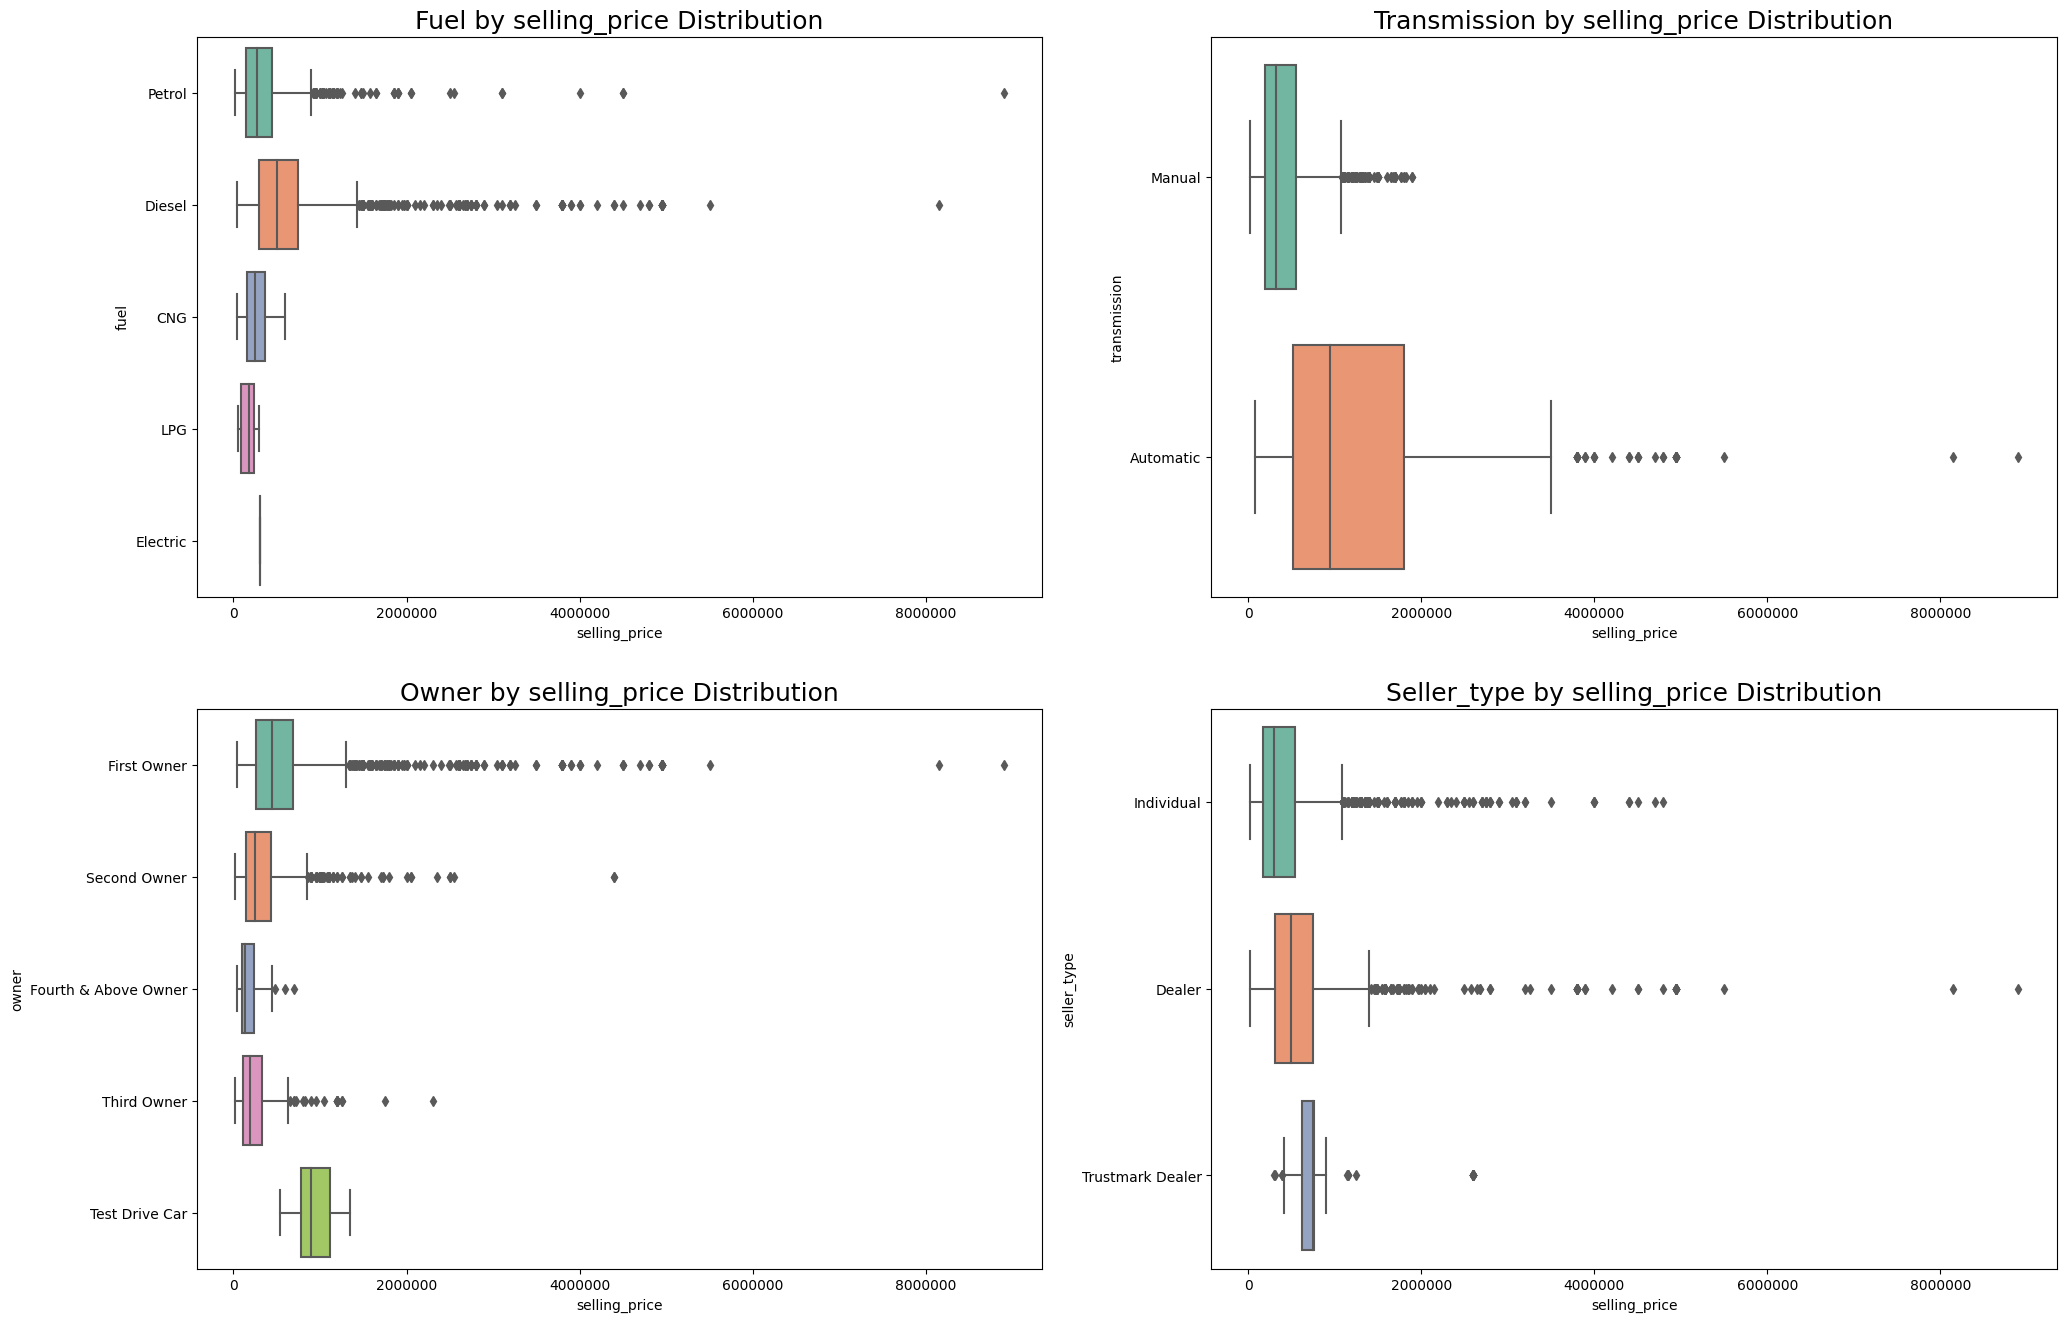

In [80]:
plt.figure(figsize=(24,16))

plt.subplot(2,2,1)
plt.title('Fuel by selling_price Distribution', fontsize=18)
sns.boxplot(data=car, x='selling_price', y='fuel', palette='Set2')
plt.ticklabel_format(style='plain', axis='x')
plt.subplot(2,2,2)
plt.title('Transmission by selling_price Distribution', fontsize=18)
sns.boxplot(data=car, x='selling_price', y='transmission', palette='Set2')
plt.ticklabel_format(style='plain', axis='x')
plt.subplot(2,2,3)
plt.title('Owner by selling_price Distribution', fontsize=18)
sns.boxplot(data=car, x='selling_price', y='owner', palette='Set2')
plt.ticklabel_format(style='plain', axis='x')
plt.subplot(2,2,4)
plt.title('Seller_type by selling_price Distribution', fontsize=18)
sns.boxplot(data=car, x='selling_price', y='seller_type', palette='Set2')
plt.ticklabel_format(style='plain', axis='x')

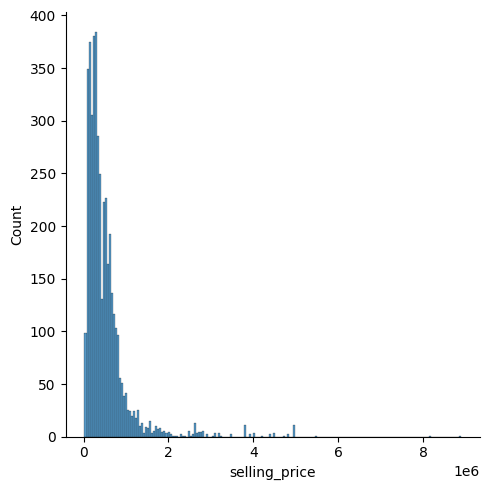

In [81]:
sns.displot(df['selling_price'])
plt.show()

In [103]:
#corr =  df.corr()

#sns.heatmap(corr,annot=True,cmap='RdBu')
#plt.show()

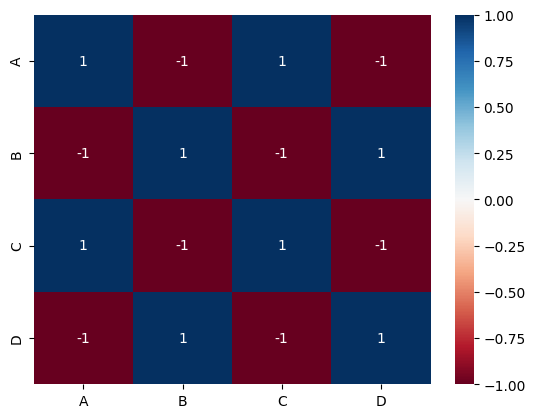

In [104]:
sns.heatmap(corr[abs(corr)>0.7],annot=True,cmap='RdBu')
plt.show()


In [83]:
df.describe(percentiles=[0.01,0.02,0.03,0.05,0.97,0.98,0.99]).T

,count,mean,std,min,1%,2%,3%,5%,50%,97%,98%,99%,max
year,4340.0,2013.090783,4.215344,1992.0,2001.00,2003.0,2004.0,2005.0,2014.0,2019.0,2019.0,2020.0,2020.0
selling_price,4340.0,504127.311751,578548.736139,20000.0,55000.00,65000.0,70000.0,80000.0,350000.0,1720750.0,2492200.0,3200000.0,8900000.0
km_driven,4340.0,66215.777419,46644.102194,1.0,1444.68,5000.0,6483.4,10000.0,60000.0,163830.0,186000.0,220000.0,806599.0


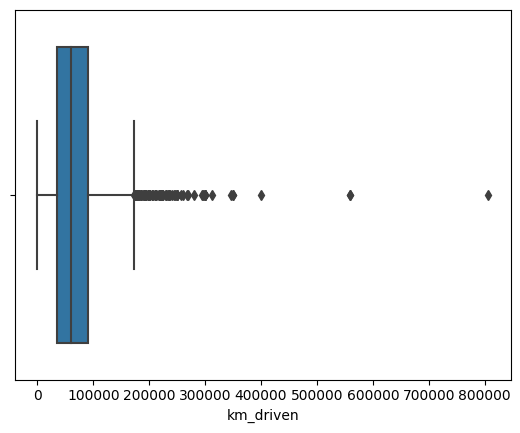

In [105]:
sns.boxplot(x=df['km_driven'])
plt.show()

In [85]:
print(df[df['km_driven']>10000].shape)

(4079, 9)


In [86]:
#### Outlier handling

In [87]:
df.columns

Index(['name', 'brand', 'year', 'selling_price', 'km_driven', 'fuel',
       'seller_type', 'transmission', 'owner'],
      dtype='object')

In [88]:
df['brand'].nunique()

29

In [89]:
print(4379*0.25)#old 3577

1094.75


In [ ]:
x_train.dtypes

In [119]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3255,)
(1085,)
(3255,)
(1085,)


In [102]:
#### Create function to cpmute MSE, RMSE, MAE,Trai and Test Test Score

In [103]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [94]:
def eval_model(ytest,ypred):
    mae = mean_absolute_error(ytest,ypred)
    mse = mean_squared_error(ytest,ypred)
    rmse = np.sqrt(mse)
    r2s = r2_score(ytest,ypred)
    print('MAE',mae)
    print('MSE',mse)
    print('RMSE',rmse)
    print('R2 Score',r2s)

In [120]:
x_train.dtypes

dtype('O')

In [121]:
####Import ML model buliding libraries

In [122]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [123]:
#### Model saving
import pickle

In [124]:
pickle.dump(df,open('datacar..pkl','wb'))
pickle.dump(Pipeline, open('dt_modelcar..pkl', 'wb'))